# Correlation Analysis Notebook

This notebook calculates the correlation between selected fields in a CSV file and visualizes the correlation matrix.

In [30]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1: Load the CSV File

In [31]:
# Replace 'your_file.csv' with your CSV file path
file_path = 'datasets/Courses.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,index,Random,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,0,86,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,...,0,12/19/2012,11/17/2013,NaN,9.0,NaN,NaN,0,NaN,1.0
1,1,7,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,...,0,10/15/2012,NaN,NaN,9.0,NaN,1.0,0,NaN,1.0
2,2,70,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,...,0,2/8/2013,11/17/2013,NaN,16.0,NaN,NaN,0,NaN,1.0
3,3,60,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,...,0,9/17/2012,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0
4,4,3,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,...,0,12/19/2012,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0


## Step 2: Select Fields for Correlation Analysis

In [48]:
# Specify the fields for correlation analysis
selected_fields = ['viewed', 'explored', 'nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts', 'grade'] 
subset_data = data[selected_fields]

subset_data_filtered = subset_data.dropna()
subset_data_filtered.loc[:, ['grade']] = subset_data_filtered['grade'].map(lambda x: x.strip())
subset_data_filtered.loc[:, ['grade']] = pd.to_numeric(subset_data_filtered['grade'])

# Display the selected data
subset_data_filtered.head()

,viewed,explored,nevents,ndays_act,nplay_video,nchapters,nforum_posts,grade
5,1,1,502.0,16.0,50.0,12.0,0,0.0
15,1,0,75.0,14.0,5.0,2.0,0,0.0
16,1,0,11.0,2.0,2.0,1.0,0,0.0
18,1,0,56.0,11.0,1.0,2.0,1,0.0
76,1,0,36.0,12.0,2.0,1.0,0,0.0


## Step 3: Compute the Correlation Matrix

In [49]:
# Compute the correlation matrix
correlation_matrix = subset_data_filtered.corr()

# Display the correlation matrix
correlation_matrix

,viewed,explored,nevents,ndays_act,nplay_video,nchapters,nforum_posts,grade
viewed,1.000000,0.000993,0.001066,0.001237,0.000670,0.001794,0.000325,0.000968
explored,0.000993,1.000000,0.700970,0.753915,0.391648,0.865325,0.145594,0.810634
nevents,0.001066,0.700970,1.000000,0.856035,0.713076,0.775970,0.195622,0.755909
ndays_act,0.001237,0.753915,0.856035,1.000000,0.502573,0.836544,0.218382,0.795131
nplay_video,0.000670,0.391648,0.713076,0.502573,1.000000,0.426885,0.098548,0.402151
nchapters,0.001794,0.865325,0.775970,0.836544,0.426885,1.000000,0.175569,0.809692
nforum_posts,0.000325,0.145594,0.195622,0.218382,0.098548,0.175569,1.000000,0.155429
grade,0.000968,0.810634,0.755909,0.795131,0.402151,0.809692,0.155429,1.000000


## Step 4: Visualize the Correlation Matrix

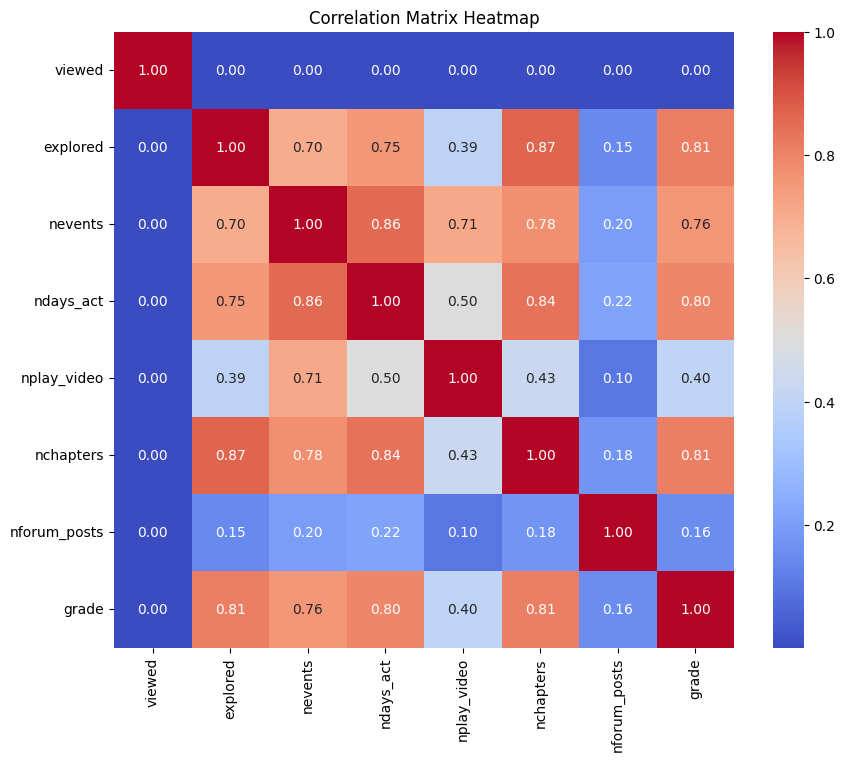

In [50]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()